### **Title : Using Known Patient Health Statistics to Determine an Incoming Patient's Risk of Heart Disease**

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(stringr)
library(ggplot2)
library(cowplot)
options(repr.matrix.max.rows = 6)
set.seed(10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

- Packages containing functions required for the following classification model. This include packages for code required for classification functions and graphing of scatterplots, bargraphs and line graphs to visualize dataset and classfication model.

#### **Introduction**
As of right now, Coronary Artery Disease(CAD) has been identified as the most common heart disease, often presenting as chest pain due to significant narrowing of the major arteries around the heart(Centers for Disease Control and Prevention, 2021). It has now become a wide spread epidemic on a global scale to the extent that it is now considered the foremost cause of premature mortality and loss of life. In low and middle income countries alone CAD accounts for nearly 7 million deaths and 129 million DALYs annually, a unit of measurement that determines how many years of healthy life was loss either by premature mortality or development of long term disability as a result of contracting CAD(Ralapanawa & Sivakanesan, 2021). Though the United States of America has always been considered to be a high income country, even it still struggles with the prevention and treatment of CAD. Estimates inidcate that around 18.2 million American adults already have CAD (U.S. Department of Health and Human Services). Furthermore, the city of Cleveland, OH has officially been identified as the poorest city within the US, reported to have the highest unemployment and poverty rates though little study has been done to quantify the spread of CAD within such low income areas(Campbell, 2020). Taking all of this information into account, it is clear that we need to study CAD among the Cleveland population to determine the health and well being of US citizens living in these low income areas, however it is unrealistic to perform medical biopsies on every citizen to collect this data. Instead we must use other methods such as statistics and modeling to predict if a person has or is at risk of CAD.

**Question: Can a classification statistics model be used to predict whether a patient is at risk of Coronary Artery Disease from the data of a known sample group?**

We use the Cleveland heart disease data (Janosi et al., 1988), which is a comma separated value file showing a collection of health statistics from patients residing within Cleveland of various ages and sex, who have either been classified as healthy or been diagnosed as positive for a heart disease or condition. As CAD is the most common form of heart disease and the narrowing of arteries are predominant symptoms of CAD (Centers for Disease Control and Prevention, 2021) the researchers for this dataset classified patients whose major arteries have narrowed by more than 50% to be positive for CAD and heart disease in general. 

We can then use a classification algorithm model to determine if any incoming patients have or is potentially at risk of heart disease by comparing their vitals and statistics with that of previously examined and diagnosed patients. 

**Hypothesis: We hypothesize that numerical variables Age and Max Heart Rate can be used as predictor variables to create a classificaation model algorithm to predict the risk of heart disease in new incoming patients and that the model we create will have a low accuracy rate and as a result be ineffective in predicting heart disease risk.**



#### **Methods and Results**


In [2]:
cleveland_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
colnames(cleveland_data)<-c("age","sex","chest_pain","rest_bps","cholestrol_level","high_fbs?",
                            "rest_electrographics","max_heartrate","exercise_induced_angina","oldpeak","slope",
                            "colored_major_vessels","thal","risk_level")
cleveland_data


New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,rest_bps,cholestrol_level,high_fbs?,rest_electrographics,max_heartrate,exercise_induced_angina,oldpeak,slope,colored_major_vessels,thal,risk_level
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Table 1:** Initial heart disease dataset before cleaning and wrangling occurs. As the original datframe did not have column names, they have been provided to help provide better clarity for each potential predictor variable.

Included below is the data dictionary created for our specific dataframe using descriptions from the source (UCI Machine Learning Repository)

* age(numerical): age in years*

* sex: sex (1 = male; 0 = female)*
* chest_pain: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

* rest_bps(numerical): resting blood pressure (in mm Hg on admission to the hospital)*

* cholestrol_level(numerical): blood serum cholestoral in mg/dl*

* high_fbs?: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)*

* rest_electrographics: resting electrocardiographic results*
-- Value 0: normal
-- Value 1: having ST-T wave abnormality associated with an increased risk of adverse cardiac events (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy, thickening of the wall of the heart's main pumping chamber, by Estes' criteria

* max_heartrate(numerical): maximum heart rate achieved by patient under strenuous exercise*

* exercise_induced_angina: exercise induced angina (1 = yes; 0 = no)*

* oldpeak: ST depression, dip below the baseline in a person's electrocadiographic results, induced by exercise relative to rest. Associated with diseases such as hypokalemia, myocardial ischemia, and a left bundle branch block

* slope: the slope of the peak exercise ST segment, the noramlly flat, isoelectric section of the electrocardiograph between the end of the S wave (the J point) and the beginning of the T wave*
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

* colored_major_vessels: number of major vessels (0-3) colored by flourosopy, indicates build up of materials causing narrowing and blockage*

* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect*

* risk_level: diagnosis of heart disease (angiographic disease status)*
-- present (values 1,2,3,4) from absent (value 0)
-> patients with more than 50% narrowing in their major vessels were classified to have a heart disease(present)

There are 4 numerical variables in the dataset (age, cholestrol level, resting blood pressure, and max heartrate) that can potentially act as our predictor variables for our classification algorithm model predicting risk level. In order to determine which variables to use for our predictors, the variables are visualized as distributions in histograms to observe if an an presence or absence of heart disease risk correlate with higher or lower variable values.

In [3]:
set.seed(1000)

cleveland_clean<-cleveland_data|>
                select(age, rest_bps, max_heartrate, cholestrol_level, risk_level)|>
                mutate(risk_level=case_when(risk_level==0~"Absent",risk_level==1~"Present",
                                         risk_level==2~"Present",risk_level==3~"Present",risk_level==4~"Present")) |>
                mutate(risk_level = as_factor(risk_level))

cleveland_split <- initial_split(cleveland_clean, prop = 0.75, strata = risk_level)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)
cleveland_train
cleveland_test

age,rest_bps,max_heartrate,cholestrol_level,risk_level
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
37,130,187,250,Absent
56,120,178,236,Absent
57,140,148,192,Absent
⋮,⋮,⋮,⋮,⋮
57,140,123,241,Present
57,130,115,131,Present
57,130,174,236,Present


age,rest_bps,max_heartrate,cholestrol_level,risk_level
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
41,130,172,204,Absent
62,140,160,268,Present
57,120,163,354,Absent
⋮,⋮,⋮,⋮,⋮
58,125,144,220,Absent
45,110,132,264,Present
68,144,141,193,Present


**Table 2:** Clean and wrangled dataset by selecting for only the numerical variables and mutating the predicted attribute risk_level into a categorical variable with two human readable categories(absent and present) . As well as split original dataset to Training(75%) and Testing(25%). Training data will be used to design predictive model (classifier) in the following code.

Splitting the dataset into Training Set and Testing Set in order to prepare for after we build our classification model using the Training Set we can use the Testing data to calculate its accuracy rate. We do this to avoid "overfitting", which occurs when we use the same dataset to both create the model and test the model for accuracy. The model fits the training data too closely and will not give us a true evaluation of the performance of the model.

In [4]:
predictor_summary<- cleveland_train |>
                        group_by(risk_level) |>
                        summarize(across(age:cholestrol_level, mean),count = n()) |>
                        rename("Mean Age" = age,
                                "Mean Rest_BPS"=rest_bps,
                               "Mean Maximum Heartrate" = max_heartrate,
                               "Mean Cholestrol Level"=cholestrol_level,
                               "Risk Level" = risk_level,
                                "No of Patients"=count)

predictor_summary

Risk Level,Mean Age,Mean Rest_BPS,Mean Maximum Heartrate,Mean Cholestrol Level,No of Patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Present,56.66346,134.4615,139.9904,248.1346,104
Absent,51.80328,128.4180,159.5328,244.8689,122


**Table 3:** Summary table calculating the number of patients for each risk level and the average values of each potential predictive variable between patients who are and are not classified as at risk of heart disease. 

As you can see in this summary table, there are a fewer number of patients at risk than those who are not. This is significant as the difference in sample group sizes for each class may result in average values being skewed as each individual patient within the "present" risk sample set would have greater influence on average values calculated in each variable column.

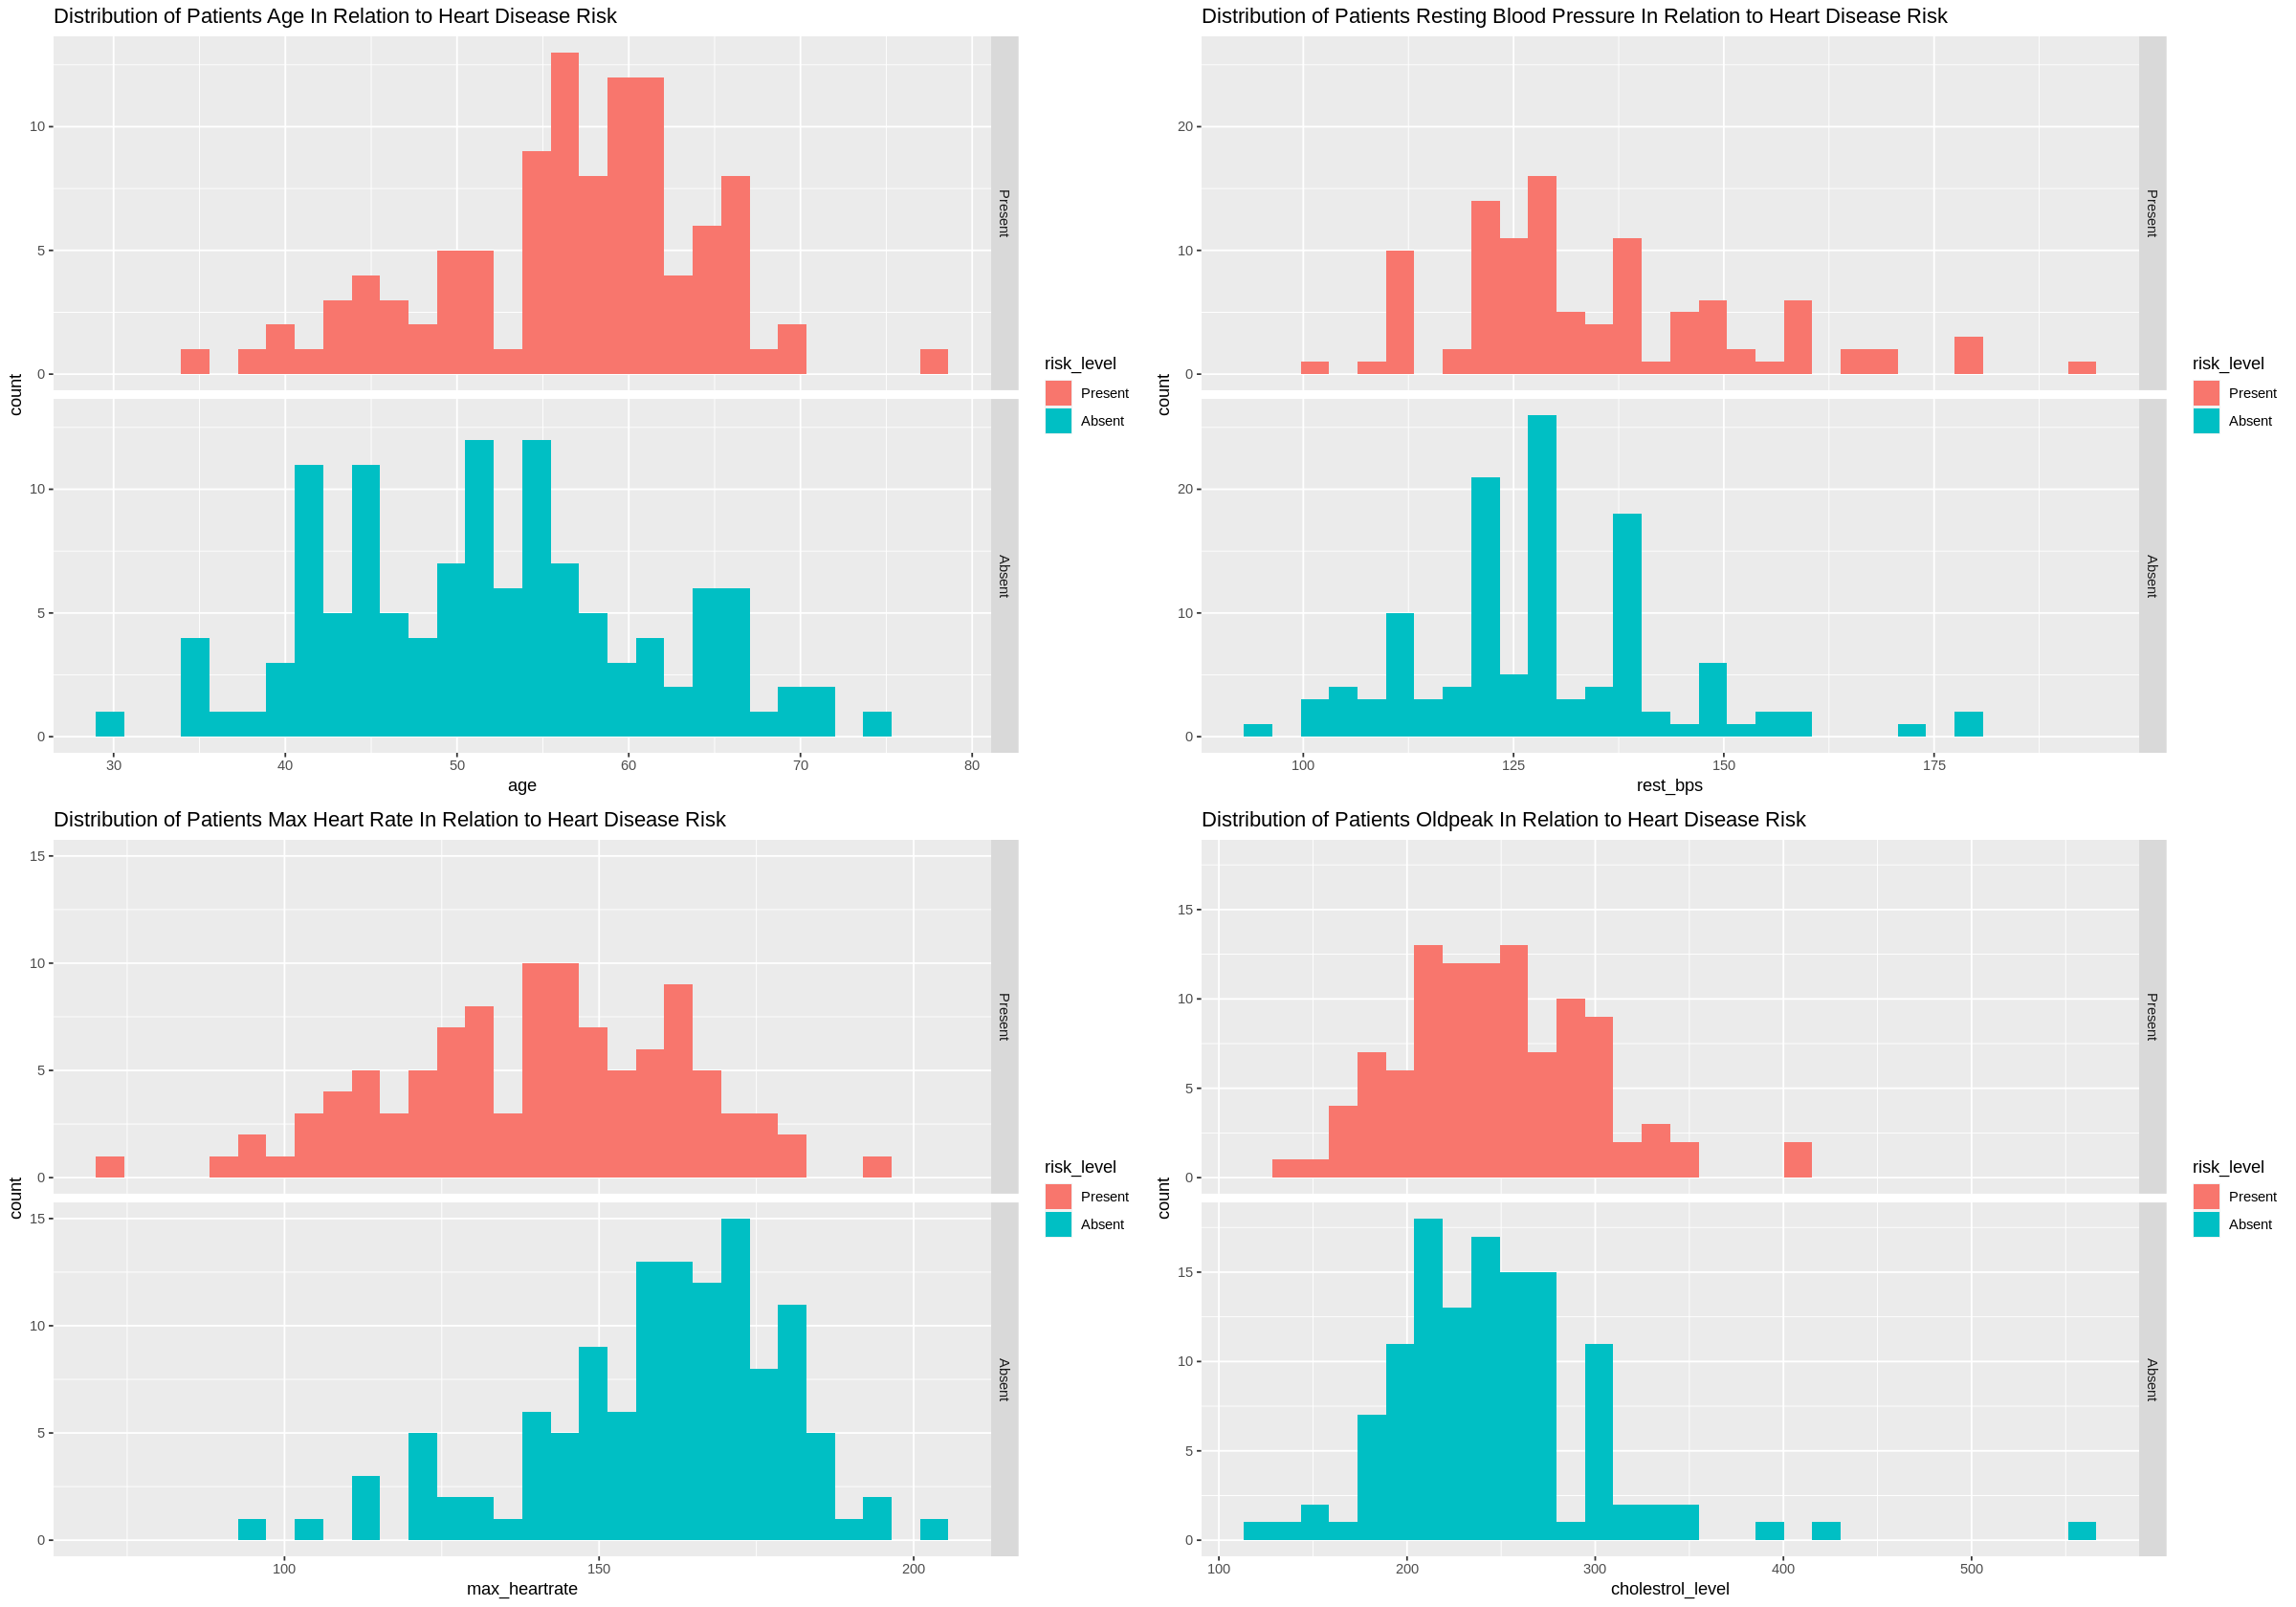

In [18]:
options(repr.plot.width=20, repr.plot.height=14)
predictor_age <- cleveland_train |>
            ggplot(aes(age, fill = risk_level)) +
            geom_histogram(bins=30) +
            facet_grid(rows = vars(risk_level))+
            ggtitle("Distribution of Patients Age In Relation to Heart Disease Risk")


predictor_rest_bps<-cleveland_train |>
            ggplot(aes(rest_bps, fill = risk_level)) +
            geom_histogram(bins=30) +
            facet_grid(rows = vars(risk_level)) +
            ggtitle("Distribution of Patients Resting Blood Pressure In Relation to Heart Disease Risk")


predictor_max_heartrate<-cleveland_train |>
            ggplot(aes(max_heartrate, fill = risk_level)) +
            geom_histogram(bins=30) +
            facet_grid(rows = vars(risk_level)) +
            ggtitle("Distribution of Patients Max Heart Rate In Relation to Heart Disease Risk")


predictor_oldpeak<-cleveland_train |>
            ggplot(aes(cholestrol_level, fill = risk_level)) +
            geom_histogram(bins=30) +
            facet_grid(rows = vars(risk_level)) +
            ggtitle("Distribution of Patients Oldpeak In Relation to Heart Disease Risk")


plot_grid(predictor_age, predictor_rest_bps, predictor_max_heartrate, predictor_oldpeak)


**Figure 1:** Distribution of the 4 numerical variables (age, cholestrol level, resting blood pressure, and max heartrate) for patients with(present) and without(absent) heart disease.

As observed in the visualizations above, while variables oldpeak and rest_bps showed very similar distribution between patients who are and are not at risk of a heart disease, age and max_heartrate showed differences in their distribution. Specifically, a high number of patients who are at risk seem to have a lower max_heart rate and are of higher ages than patients who are classified as not at risk. 

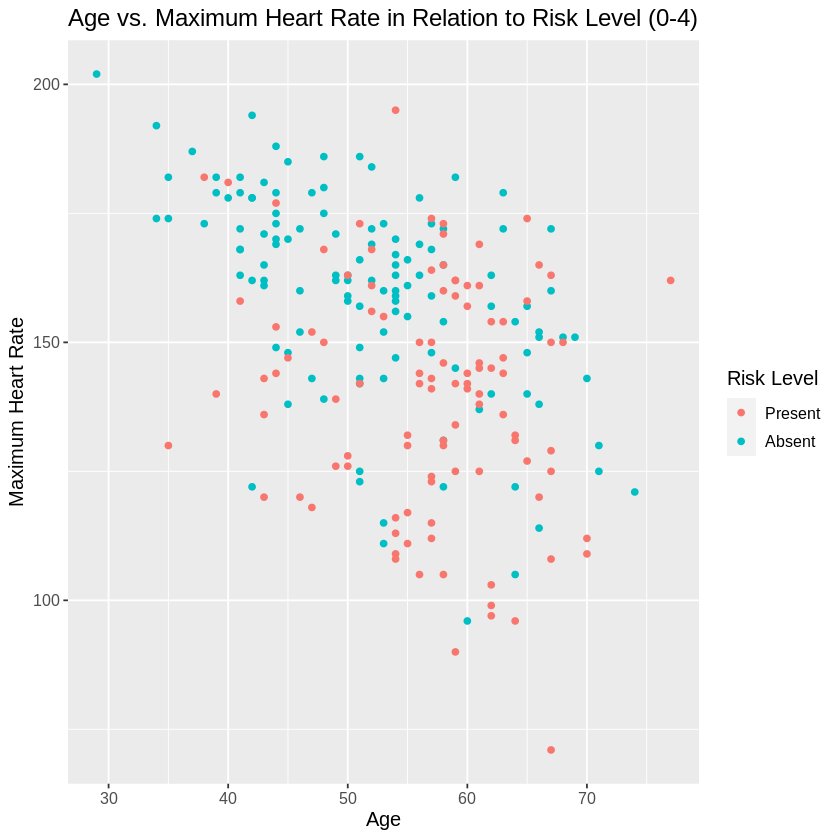

In [6]:
age_heartrate_plot_1 <- cleveland_train |>
                        ggplot(aes(x = age, y = max_heartrate, color=risk_level)) +
                        geom_point() + 
                        xlab("Age") + 
                        ylab("Maximum Heart Rate") +
                        labs(color = "Risk Level") +
                        ggtitle("Age vs. Maximum Heart Rate in Relation to Risk Level (0-4)") +
                        theme(text = element_text(size=12))

age_heartrate_plot_1

**Figure 2:** Scatter plot showing age and maximum heart rate corresponding to risks level. The plot shows that patients with no risks congregrate towards lower age and higher max heart rate, and patients classified as being at risk congregate at higher ages and lower max heart rates. This further supports age and max heart rate as predictor variables for heart disease risk.

Using the above exploratory data analysis of the data distribution, we have established that our predictor variables are Max Heart Rate and Age, and now we can use these predictor variables to train and code for a classification model to predict the class of any new incoming patient. We must then test the tarining model against the test dataset to determine which k-neighbours value, the number of datapoints closest to the new observation used in its prediction, has the highest probability success rate at predicting the correct class of any new incoming observations.

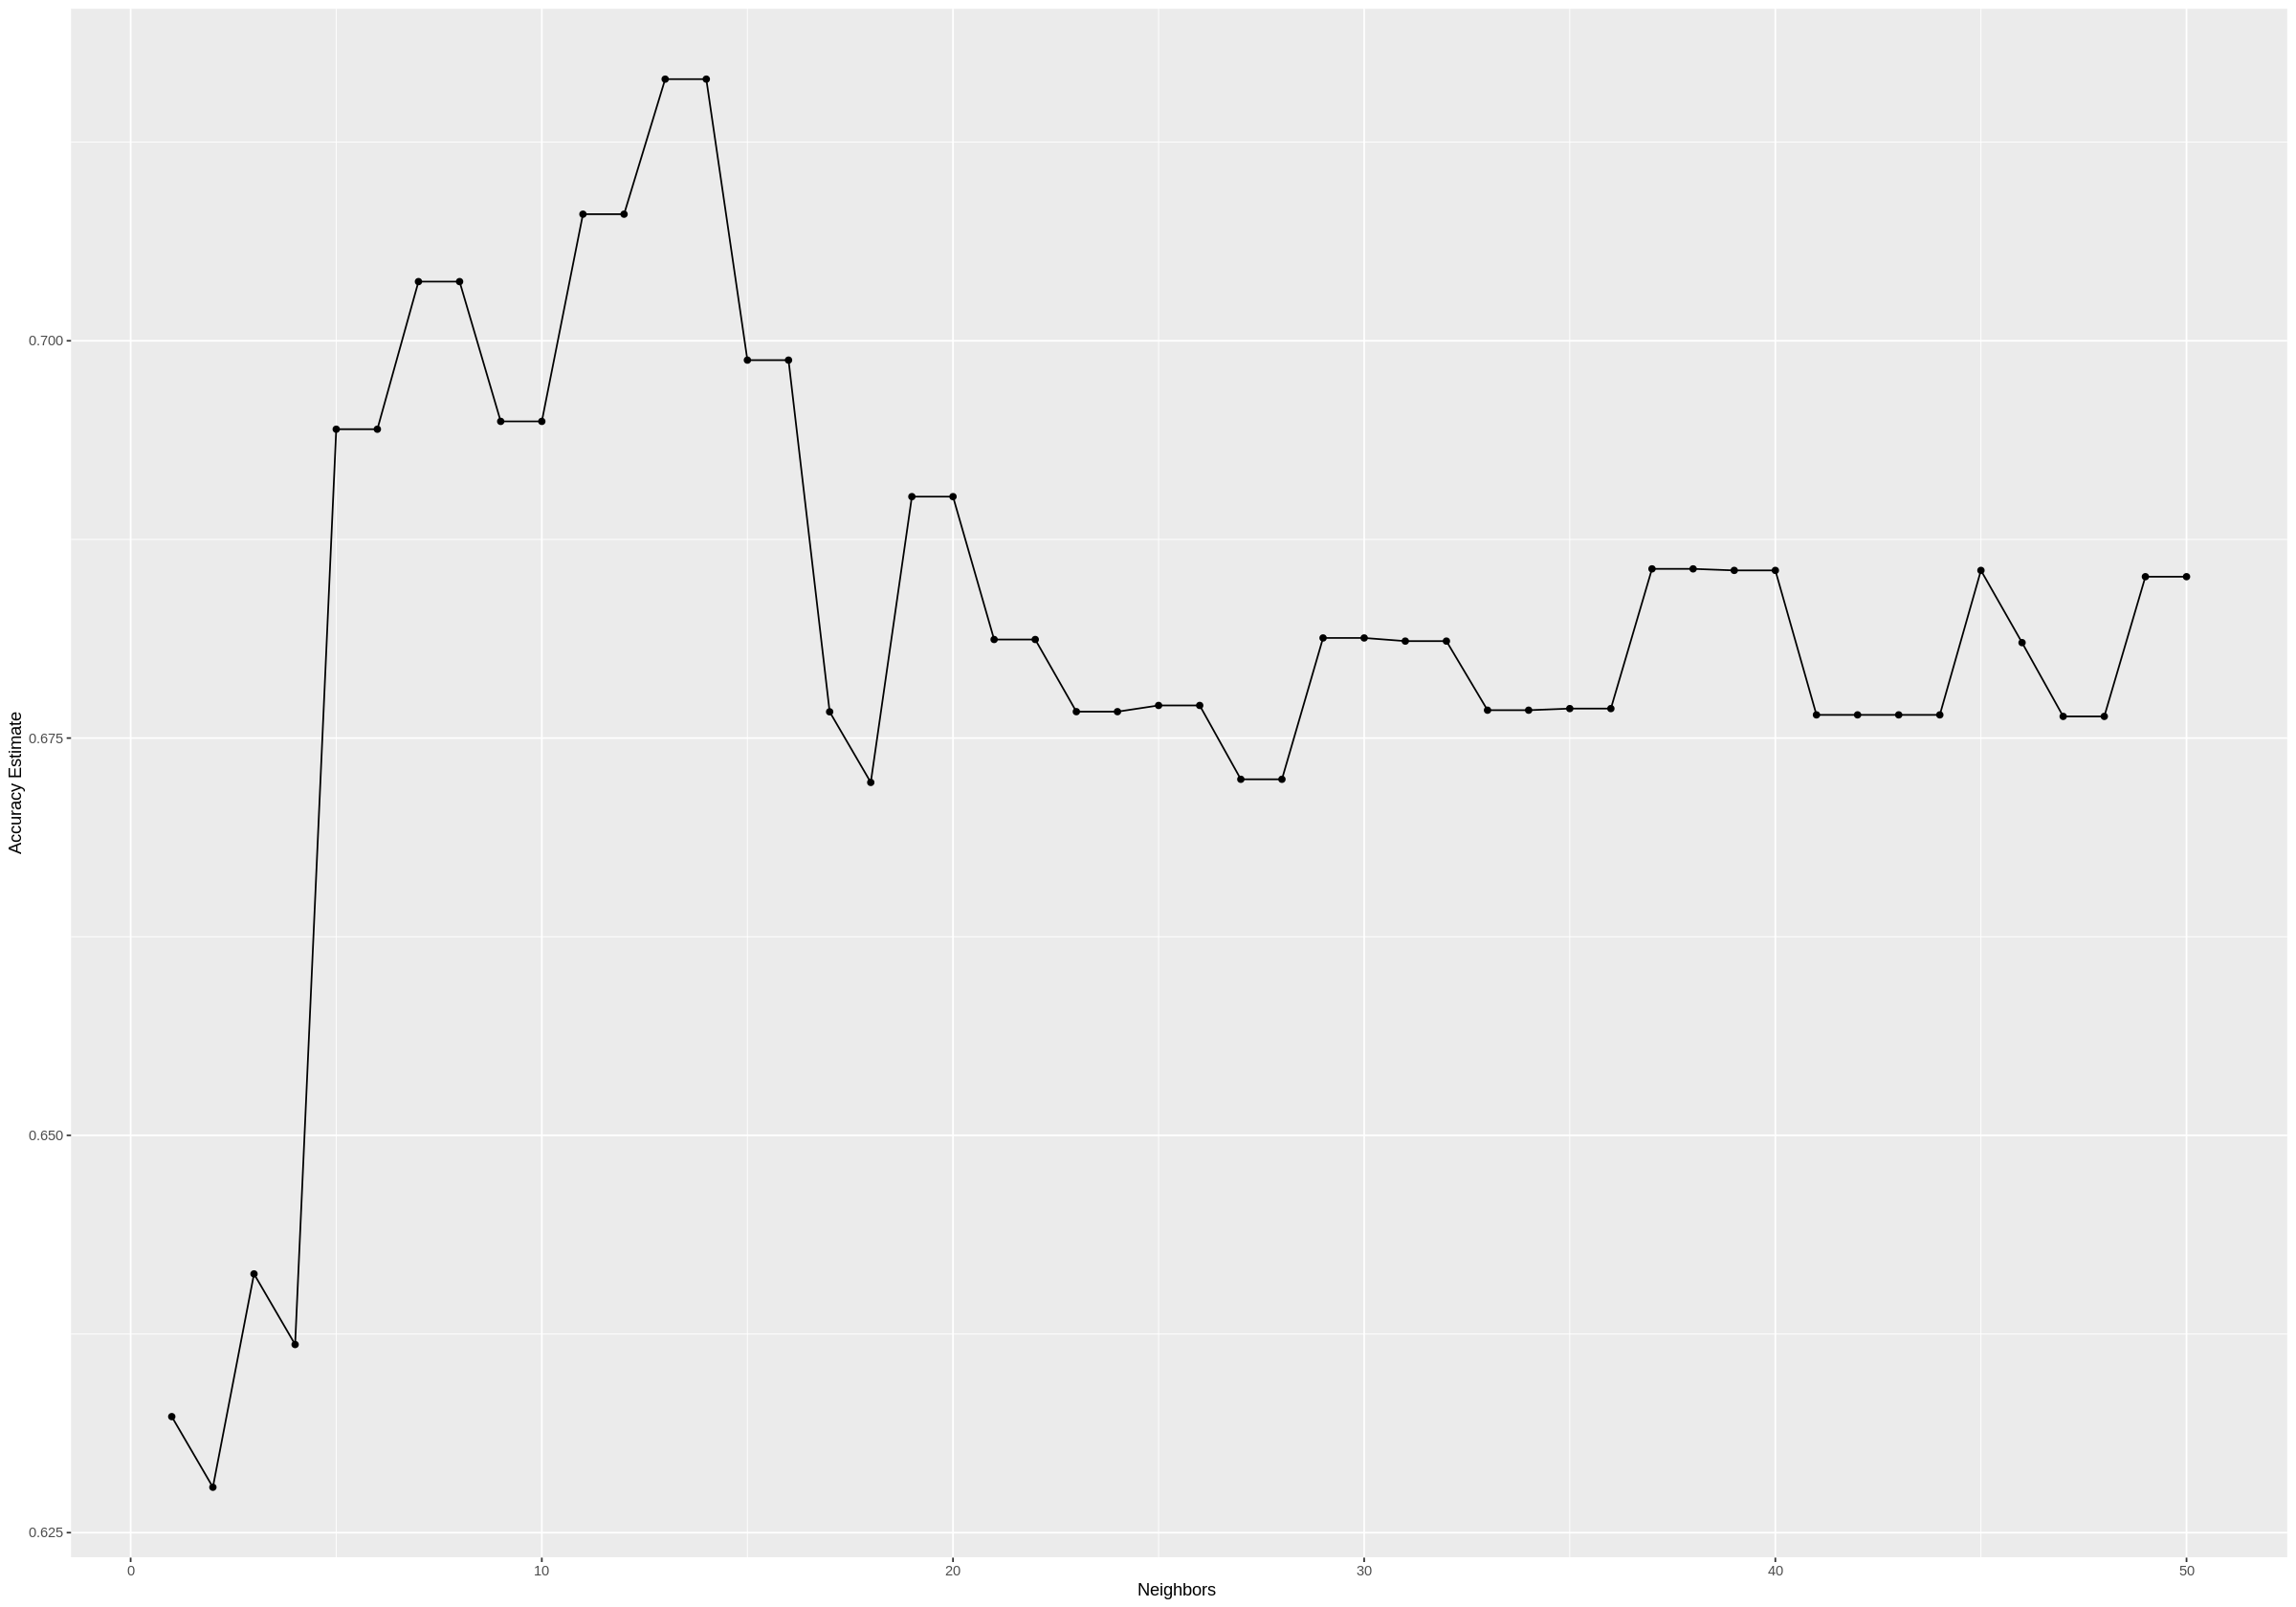

In [20]:
set.seed(2221)
heart_recipe <- recipe(risk_level ~ age+max_heartrate, data = cleveland_train) |>
                step_normalize(all_predictors())

heart_vfold <- vfold_cv(cleveland_train, v = 5, strata = risk_level)

heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

heart_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_tune) |>
    tune_grid(resamples = heart_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- heart_fit |> 
      filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors ", y = "Accuracy Estimate")

cross_val_plot

**Figure 3:** As seen in the Neighbours vs Accuracy Estimate above, using a k-neighbours value of 23-24, meaning any new observation will be compared with the closest 69 datapoints in the training data and classfied, will provide us with the highest accuracy.

As seen above, we used the k range of 1-50 because we do not want values above k=50 as it would require greater computational resource and greater risks of underfitting our data as it would take up about 1/4 of our total sample size. In the cross-validation plot above, we have calulated the statistical performance of the classification model algorithm using the specified range of k-neighbours values. As you can infer from the graph, the k-nighbours value that gives us the highest accuracy rate for the classification model is k=23. We use 23 instead of 24 because our model uses 2 classes and so all neighbours have equal "voting" on the classification of new observations and haviong an odd number of votes serves as a tie-breaker.

In [25]:
heart_model <- nearest_neighbor(weight_func = "rectangular", neighbor = 23) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_final_fit <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(heart_model) |>
            fit(data = cleveland_train)

Now that we have we have determined the best k-neighbors value for our model, we must create the model again but now we specify k=69. We can use this new model to create a new, final fit algorithm. We can reuse the heart_recipe as it is used to specify what variables are used in the algorithm and is not affected by changes in the k value specified.

In [26]:
heart_predictions <- heart_final_fit |>
                    predict(cleveland_test) |>
                    bind_cols(cleveland_test)
heart_predictions

heart_accuracy <- heart_predictions |>
                metrics(truth = risk_level, estimate = .pred_class) |>
                filter(.metric == "accuracy") |>
                select(.estimate) |>
                pull()
print(heart_accuracy*100)

heart_predictions_confmat <- heart_predictions |>
                            conf_mat(truth = risk_level, estimate = .pred_class)
heart_predictions_confmat

.pred_class,age,rest_bps,max_heartrate,cholestrol_level,risk_level
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Absent,41,130,172,204,Absent
Present,62,140,160,268,Present
Absent,57,120,163,354,Absent
⋮,⋮,⋮,⋮,⋮,⋮
Present,58,125,144,220,Absent
Present,45,110,132,264,Present
Absent,68,144,141,193,Present


[1] 71.05263


          Truth
Prediction Present Absent
   Present      28     15
   Absent        7     26

We have succesfully coded and created our classification algorithm model using k=69, and after testing it against the Testing Set and putting it through a confusion matrix to determine overall performance, we have determined that our classification model has a accuracy rate of 71%

Accuracy of classifier = 71%

#### **Discussion:**



In [10]:
#proportion for majority classifier

proportions <- cleveland_train |>
group_by(risk_level) |>
summarize(n = n()) |>
mutate(percent = 100*n/nrow(cleveland_train))

proportions

risk_level,n,percent
<fct>,<int>,<dbl>
Present,104,46.0177
Absent,122,53.9823


**Table 4**: Proportions of the 2 classes suggests that the majority class in the training data is an absent of risk of heart disease. 

A baseline to judge this classifier’s accuracy is by using a majority classifier. The tibble shows that “no risk” is the majority class in the training model. Since the prediction accuracy is similar to the proportion of the majority, the majority classifier has a very low accuracy of 54%. 


Even though the trained model has a much higher prediction accuracy compared to the majority classifier, it is not ideal to use this model to predict or diagnose a patient in real life. This is because our confusion matrix made 54 correct predictions out of 76 total observations (71.05% accuracy) and we would want a higher percent prediction accuracy to diagnose such a serious disease. 

**Possible Improvements for Future Model Training**
* In order to train the model better, we could have used a higher training:testing data ratio to 80:20 instead of 75:25 as it is said to be the optimal data splitting ratio according to the Pareto Principal(Joseph, V.R., 2022). By increasing the proportion of observations used for training, the classifier might be able to give a better prediction as we currently do not have a good classifier. 

For comparison, there have been several attempts in using computational analysis to predict heart disease with a higher prediction accuracy by using other methods and predictor variables (Muhammad et al., 2020). In addition to this, Nadakinamani et al. has previously trained a model using the very same Cleveland data set and obtained a 93.3% prediction accuracy using a different method – the Random Forest algorithm (Nadakinamani et al.,2022). This suggests that there are much better ways to train a model to predict heart disease using other algorithms rather than KNN classification to obtain a higher prediction accuracy. 


#### **References:**

Campbell, E. (2020, September 18). Cleveland is now the poorest big city in the country. *The Center for Community Solutions*. Retrieved April 2, 2023, from https://www.communitysolutions.com/cleveland-now-poorest-big-city-country/ 

Centers for Disease Control and Prevention. (2021, July 19). Coronary artery disease. *Centers for Disease Control and Prevention*. Retrieved April 2, 2023, from https://www.cdc.gov/heartdisease/coronary_ad.htm#:~:text=Narrowed%20arteries%20can%20cause%20chest,the%20rest%20of%20your%20body.&amp;text=Over%20time%2C%20CAD%20can%20weaken,blood%20the%20way%20it%20should. 

Janosi, A., Steinbrunn, W., Pfisterer, M., Detrano, R. (1988). Heart Disease Data Set. *UCI Machine Learning Repository*. Retrieved April 2, 2023, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 

Ralapanawa, U., & Sivakanesan, R. (2021). Epidemiology and the Magnitude of Coronary Artery Disease and Acute Coronary Syndrome: A Narrative Review. *Journal of epidemiology and global health, 11*(2), 169–177. https://doi.org/10.2991/jegh.k.201217.001

U.S. Department of Health and Human Services. What is coronary heart disease? *National Heart Lung and Blood Institute*. Retrieved April 2, 2023, from https://www.nhlbi.nih.gov/health/coronary-heart-disease#:~:text=About%2018.2%20million%20American%20adults,the%20surface%20of%20the%20heart. 